In [1]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog , canny
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import io, color, feature, filters

(853, 1280, 3)


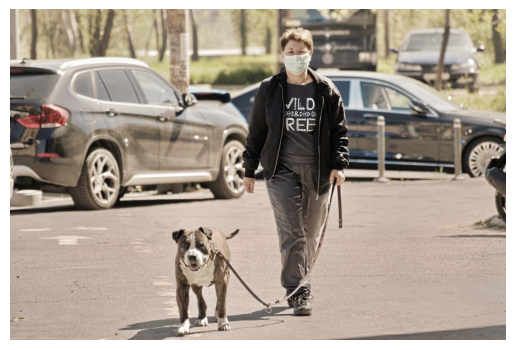

In [3]:
img = imread('/content/woman-5059062-1920.jpg')
print(img.shape)
plt.axis("off")
plt.imshow(img)

(512, 256, 3)


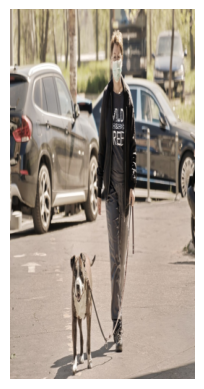

In [4]:
resized_img = resize(img, (128*4, 64*4))
print(resized_img.shape)
plt.axis("off")
plt.imshow(resized_img)

HOG

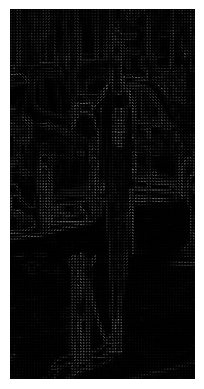

In [5]:
fd, hog_image = hog(resized_img, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

LOG

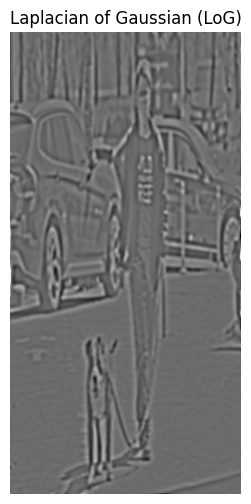

In [6]:
gray_image = color.rgb2gray(resized_img)

sigma = 2
smoothed_image = filters.gaussian(gray_image, sigma=sigma)

log_image = filters.laplace(smoothed_image)

plt.figure(figsize=(12, 6))
plt.imshow(log_image, cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.axis('off')

plt.show()

Canny Edge detection

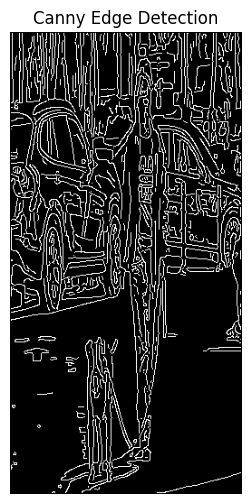

In [7]:
edges = feature.canny(gray_image)
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

DOG

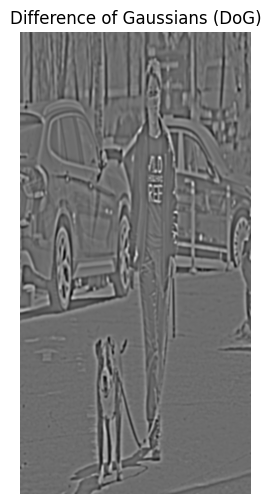

In [8]:
sigma1 = 1
sigma2 = 2

dog_image = filters.difference_of_gaussians(gray_image, low_sigma=sigma1, high_sigma=sigma2)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 2)
plt.imshow(dog_image, cmap='gray')
plt.title('Difference of Gaussians (DoG)')
plt.axis('off')

plt.show()